In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [ ]:
# The output of the torchvision datasets are PILImage images of range [0,1].
# The code below transforms them into Tensors of normalized range [-1,1].
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified


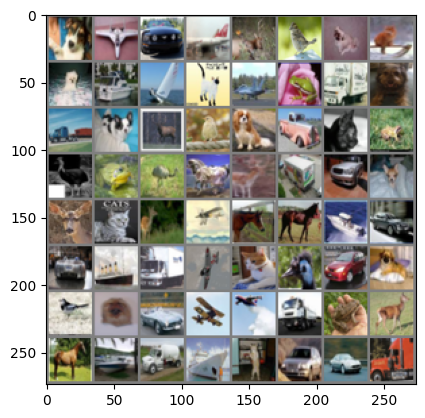

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images and labels
imshow(torchvision.utils.make_grid(images))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(3 * 32 * 32, 10)  # 3 channels, 32x32 input size, 10 output classes

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten the input
        x = self.fc(x)
        return x

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)  # 3 input channels (RGB), 16 output channels, 3x3 kernel
        self.fc1 = nn.Linear(16 * 30 * 30, 10)  # Fully connected layer

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(-1, 16 * 30 * 30)  # Flatten the output from the convolutional layer
        x = self.fc1(x)
        return x

In [ ]:
# Setup GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net = SimpleCNN().to(device)

# Define a Loss function and Optimized
import torch.optim as optim

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in trainloader:
        # Move data to the GPU
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = net(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(trainloader):.4f}')

Epoch [1/10], Loss: 1.7998
Epoch [2/10], Loss: 1.5552
Epoch [3/10], Loss: 1.4141
Epoch [4/10], Loss: 1.3186
Epoch [5/10], Loss: 1.2659
Epoch [6/10], Loss: 1.2315
Epoch [7/10], Loss: 1.2089
Epoch [8/10], Loss: 1.1872
Epoch [9/10], Loss: 1.1645
Epoch [10/10], Loss: 1.1507


In [ ]:
# Load the test dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Function to calculate accuracy
def get_accuracy(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            # Move data to the GPU
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1) # which corresponds to the predicted class scores
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return (correct / total) * 100

# Test the model
test_accuracy = get_accuracy(net, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Files already downloaded and verified
Test Accuracy: 57.77%
